# Cervical Cancer Dataset Analysis

This notebook explores the cervical cancer dataset. We will perform exploratory data analysis (EDA), visualise correlations, and prepare the data for machine learning models.

## Steps:
- Import libraries
- EDA

In [175]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy.stats import kstest
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
import openpyxl
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

## Importing Libraries and Loading Data
We start by importing necessary libraries and loading the cervical cancer dataset from the Excel file.

In [176]:
df = pd.read_excel("cervical_cancer_csv.xlsx")
df.head(10)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.000000,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.000000,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
6,51,3.0,17.0,6.0,1.0,34.000000,3.4,0.0,0.0,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,1,1,0,1
7,26,1.0,26.0,3.0,0.0,0.000000,0.0,1.0,2.0,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0
8,45,1.0,20.0,5.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,1,0,1,1,0,0,0,0
9,44,3.0,15.0,NaN,1.0,1.266973,2.8,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,0,0,0,0,0,0,0,0


### Dataset Overview
The cervical cancer dataset contains demographic, behavioural, and medical information. 

## Exploratory Data Analysis (EDA)
Let's view the statistical summary of the dataset to understand the distribution and basic statistics of each feature.

In [177]:
pd.set_option('display.max_columns', None)  
df.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,835.000000,810.000000,828.000000,779.000000,822.000000,822.000000,822.000000,732.000000,732.000000,723.000000,723.000000,735.000000,735.000000,735.000000,735.0,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.0,735.000000,735.000000,735.000000,835.000000,71.000000,71.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000
mean,27.023952,2.551852,17.020531,2.304236,0.149635,1.253850,0.465823,0.651639,2.302916,0.114799,0.527621,0.107483,0.180952,0.059864,0.0,0.005442,0.058503,0.024490,0.001361,0.001361,0.001361,0.0,0.024490,0.001361,0.002721,0.089820,6.140845,5.816901,0.021557,0.010778,0.021557,0.028743,0.041916,0.087425,0.051497,0.064671
std,8.482986,1.676686,2.817000,1.455817,0.356930,4.140727,2.256273,0.476777,3.794180,0.319000,1.965439,0.309937,0.568153,0.237396,0.0,0.073620,0.234853,0.154669,0.036886,0.036886,0.036886,0.0,0.154669,0.036886,0.052129,0.306335,5.895024,5.755271,0.145319,0.103320,0.145319,0.167182,0.200518,0.282626,0.221142,0.246091
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,8.000000,7.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,19.000000,1.000000,4.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,3.000000,22.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835 entries, 0 to 834
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 835 non-null    int64  
 1   Number of sexual partners           810 non-null    float64
 2   First sexual intercourse            828 non-null    float64
 3   Num of pregnancies                  779 non-null    float64
 4   Smokes                              822 non-null    float64
 5   Smokes (years)                      822 non-null    float64
 6   Smokes (packs/year)                 822 non-null    float64
 7   Hormonal Contraceptives             732 non-null    float64
 8   Hormonal Contraceptives (years)     732 non-null    float64
 9   IUD                                 723 non-null    float64
 10  IUD (years)                         723 non-null    float64
 11  STDs                                735 non-n

## Correlation Analysis
The heatmap below shows the correlation between numerical features in the dataset. This helps identify relationships and potential multicollinearity.

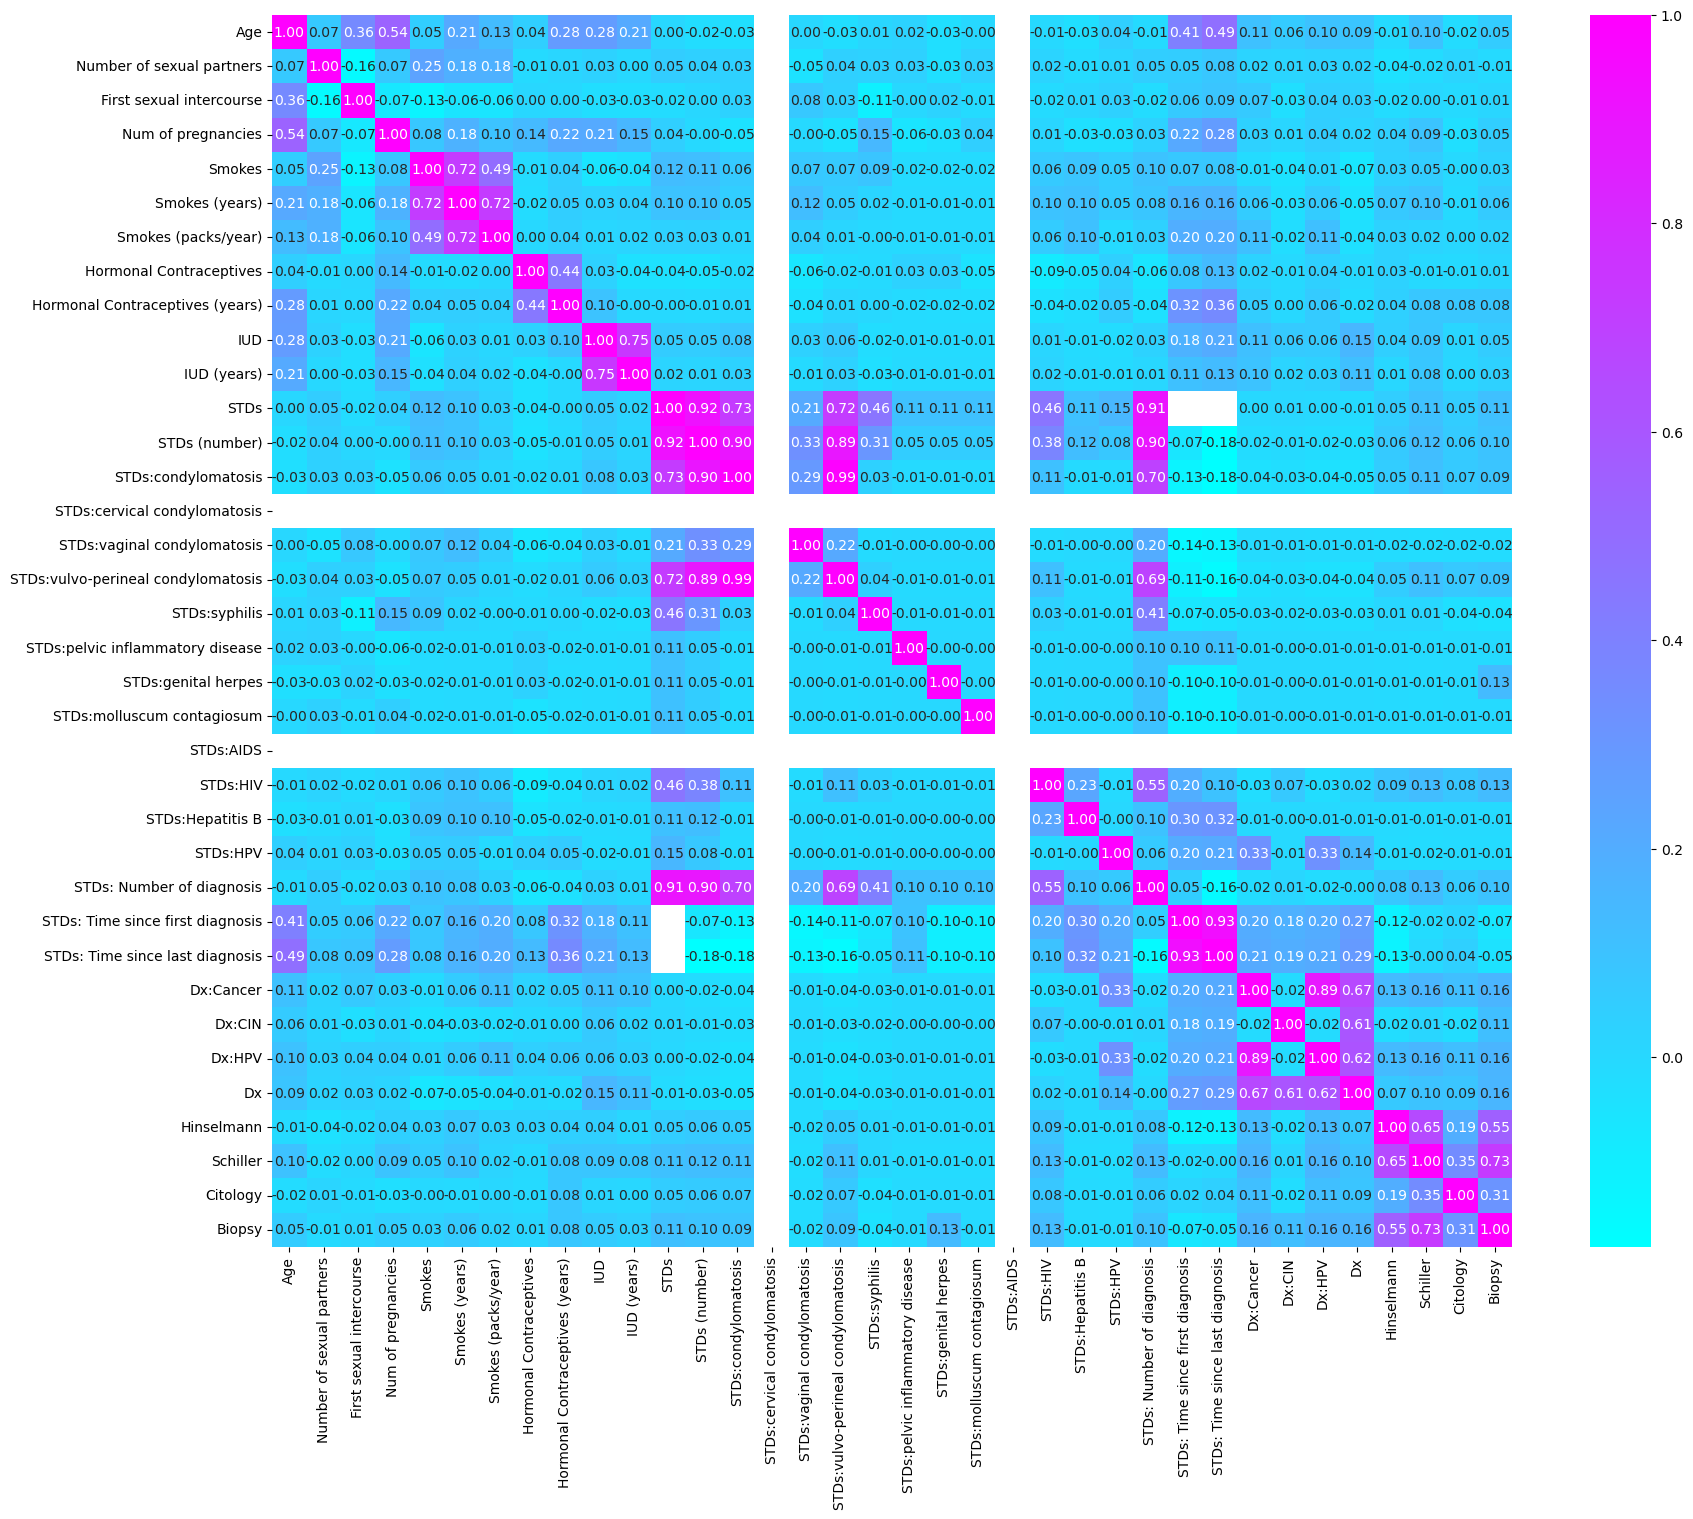

In [179]:
plt.figure(figsize=(20, 16))  # width=12, height=8 inches
sns.heatmap(df.corr(numeric_only=True), fmt=".2f", cmap="cool", annot=True)
plt.show()

### Handling Missing Values
- 'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis' columns were dropped due to too many missing values.
- Categorical columns: Imputed with mode (most frequent value)
- Numeric columns: Imputed with median value.

This ensures the dataset is complete for further analysis and modeling.

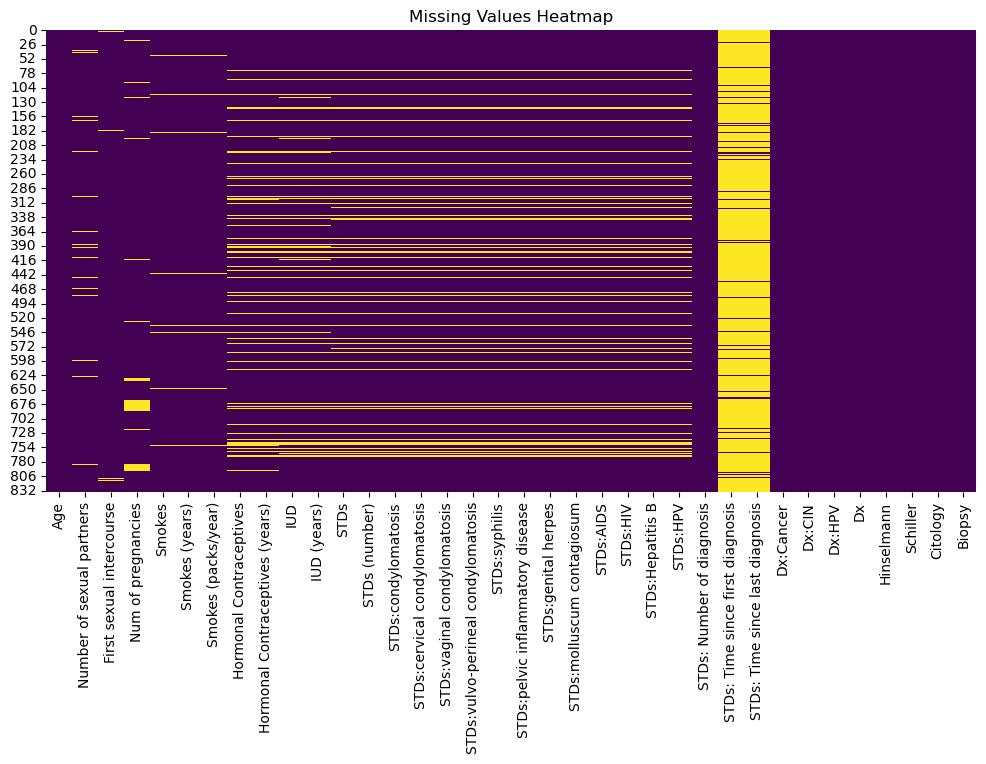

In [180]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [181]:
df.drop(['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis'], axis=1, inplace=True)


In [182]:
cateogorical_cols = [col for col in df.columns if set(df[col].dropna().unique()) <= {0, 1}]

numeric_cols = [col for col in df.columns if col not in cateogorical_cols]

print("Categorical columns:", cateogorical_cols)
print("Other numeric columns:", numeric_cols)

mode_values = {col: df[col].mode()[0] for col in cateogorical_cols}
df.fillna(mode_values, inplace=True)

median_values = {col: df[col].median() for col in numeric_cols}
df.fillna(median_values, inplace=True)

Categorical columns: ['Smokes', 'Hormonal Contraceptives', 'IUD', 'STDs', 'STDs:condylomatosis', 'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis', 'STDs:pelvic inflammatory disease', 'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV', 'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller', 'Citology', 'Biopsy']
Other numeric columns: ['Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs (number)', 'STDs: Number of diagnosis']


### Feature Distributions and Class Balance

Visualising the distribution of age and number of sexual partners helps understand the population. The class balance plot shows the distribution of the target variable (Biopsy).

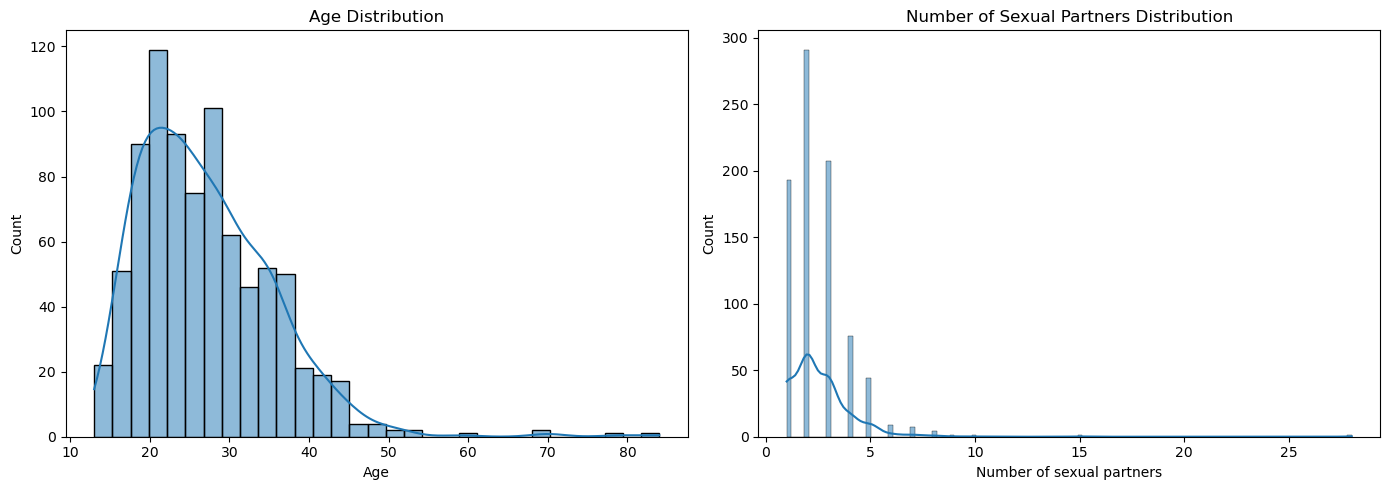

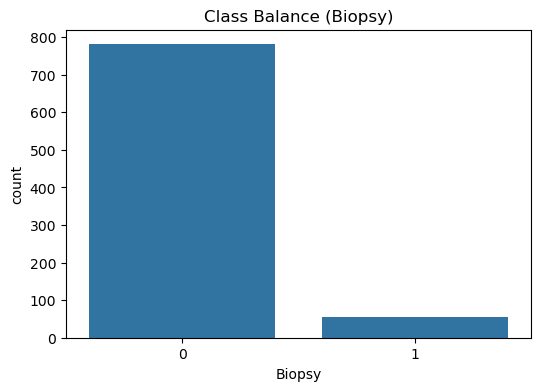

In [183]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(df['Age'].dropna(), kde=True, ax=axes[0])
axes[0].set_title('Age Distribution')
sns.histplot(df['Number of sexual partners'].dropna(), kde=True, ax=axes[1])
axes[1].set_title('Number of Sexual Partners Distribution')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x='Biopsy', data=df)
plt.title('Class Balance (Biopsy)')
plt.show()

## Feature Relationships and Outlier Analysis
Let's examine relationships between key features and check for outliers using boxplots and pairplots.

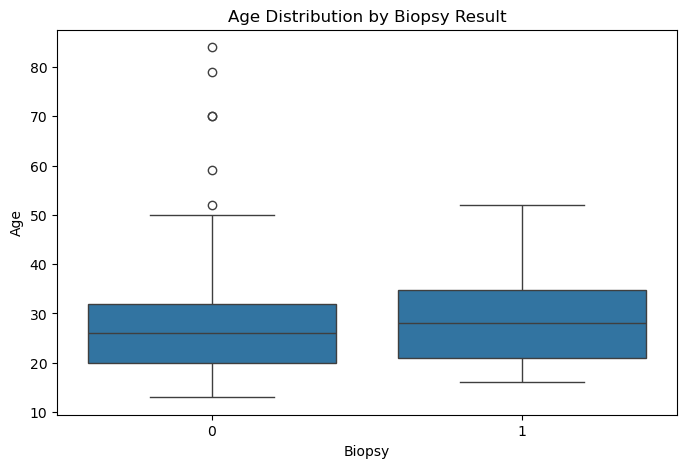

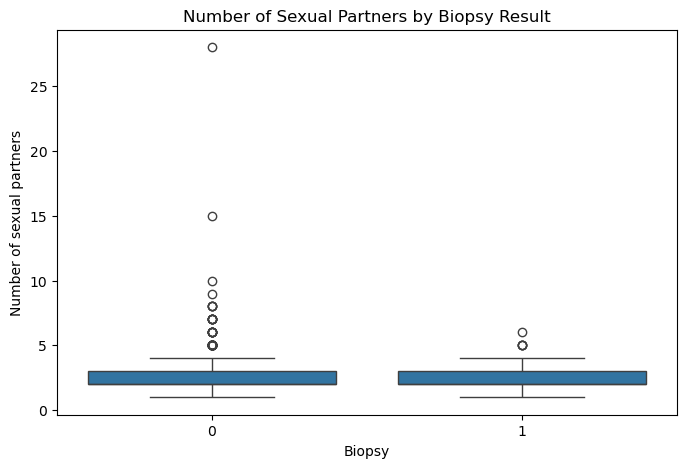

In [184]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Biopsy', y='Age', data=df)
plt.title('Age Distribution by Biopsy Result')
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x='Biopsy', y='Number of sexual partners', data=df)
plt.title('Number of Sexual Partners by Biopsy Result')
plt.show()

Pairplots visualize relationships between multiple features and the target.

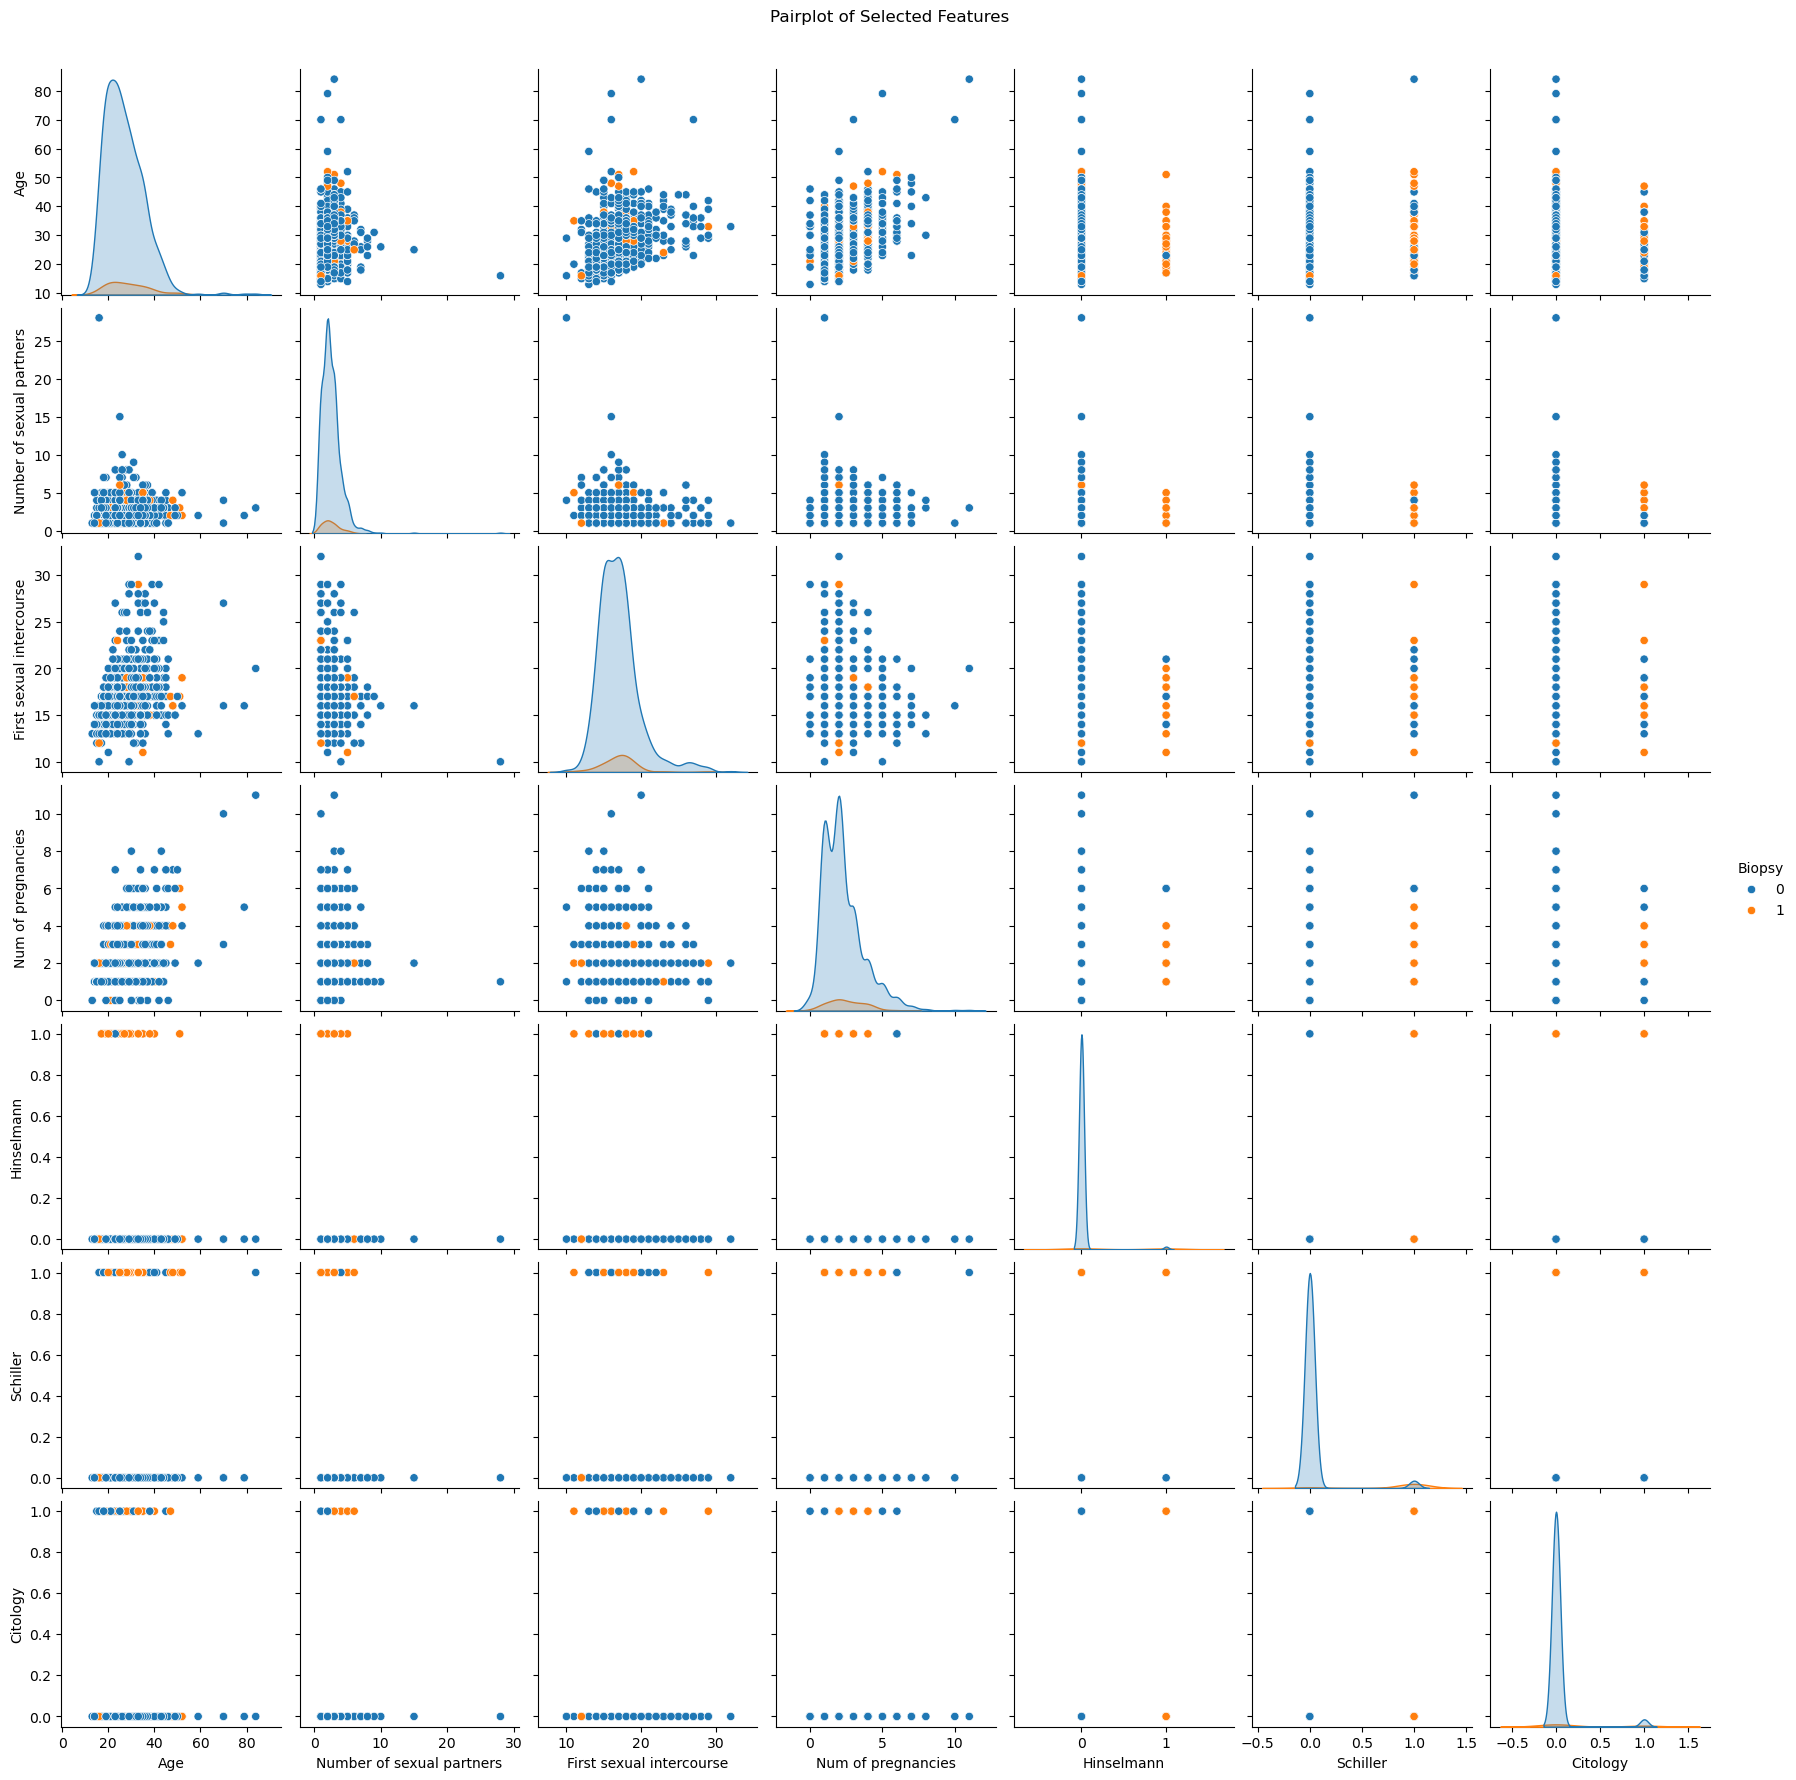

In [185]:
selected_cols = ['Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 'Hinselmann', 'Schiller', 'Citology', 'Biopsy']
sns.pairplot(df[selected_cols].dropna(), hue='Biopsy')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

### SMOTE function for workflow (avoid throwing away too many majority class)

In [186]:
def smote_train_test_split(X, y, test_size=0.2, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, stratify=y, random_state=random_state
    )
    
    smote = SMOTE(random_state=random_state)
    X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)
    
    return X_train_bal, X_test, y_train_bal, y_test

## Feature Importance and Predictive Modeling
Let's identify which features are most important for predicting cervical cancer using a Random Forest model. This can help guide further analysis and feature selection.

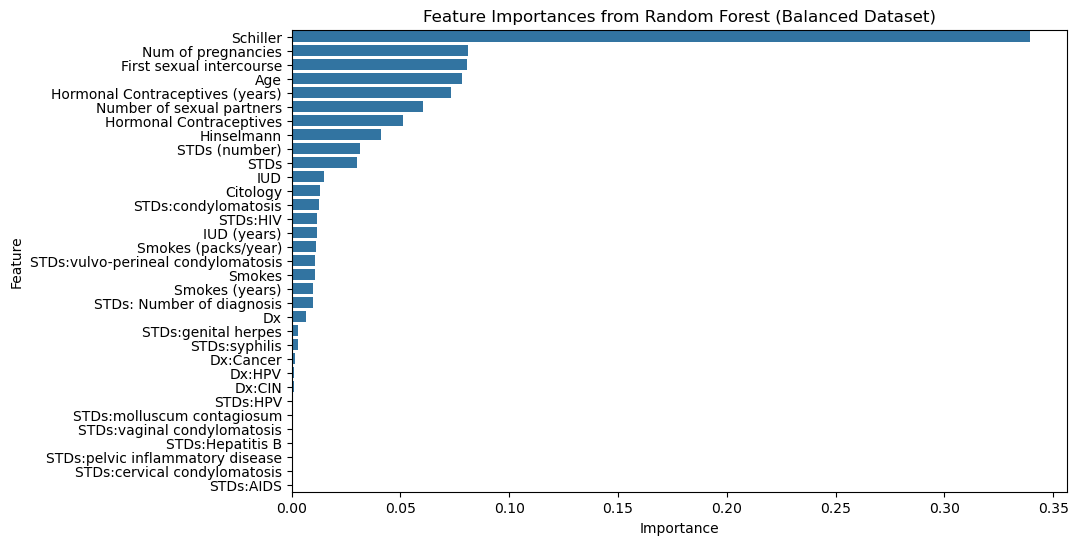

                           Feature  Gini Importance
0                         Schiller         0.339227
1               Num of pregnancies         0.081086
2         First sexual intercourse         0.080817
3                              Age         0.078393
4  Hormonal Contraceptives (years)         0.073457


In [187]:
X = df.drop('Biopsy', axis=1).select_dtypes(include=[np.number])
y = df['Biopsy']

X_train, X_test, y_train, y_test = smote_train_test_split(X, y, test_size=0.2)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=feature_names[indices])
plt.title('Feature Importances from Random Forest (Balanced Dataset)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

feature_imp_df = pd.DataFrame({
    'Feature': feature_names[indices],
    'Gini Importance': importances[indices]
}).head(5)
print(feature_imp_df)


### Below for XGBoost

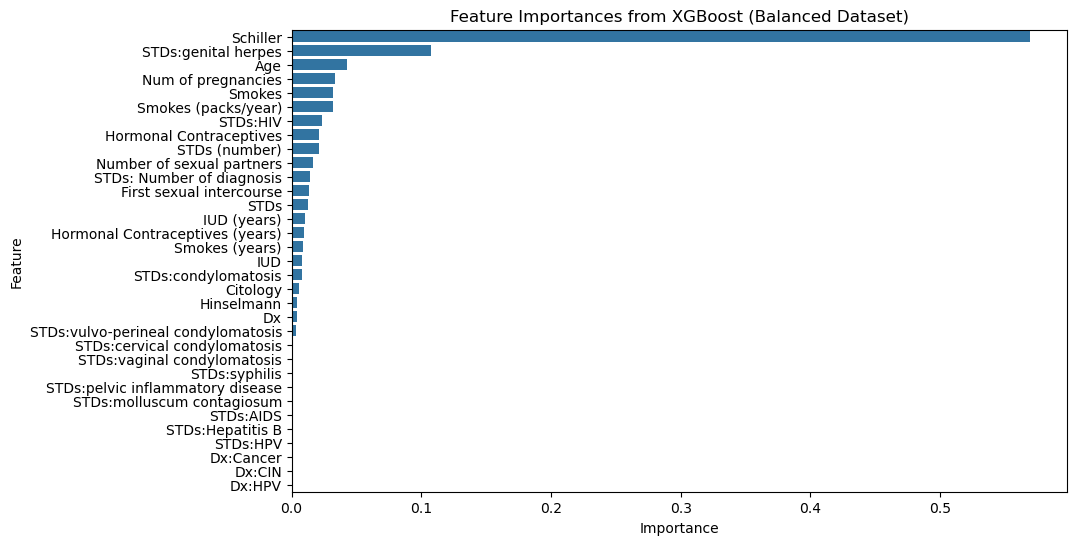

               Feature  Importance
0             Schiller    0.569147
1  STDs:genital herpes    0.107258
2                  Age    0.042565
3   Num of pregnancies    0.033123
4               Smokes    0.032241


In [188]:
X = df.drop('Biopsy', axis=1).select_dtypes(include=[np.number])
y = df['Biopsy']

X_train, X_test, y_train, y_test = smote_train_test_split(X, y, test_size=0.2)

xgb_model = xgb.XGBClassifier(random_state=42, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

importances = xgb_model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=feature_names[indices])
plt.title('Feature Importances from XGBoost (Balanced Dataset)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

feature_imp_df = pd.DataFrame({
    'Feature': feature_names[indices],
    'Importance': importances[indices]
}).head(5)
print(feature_imp_df)


### Try logistic classifier

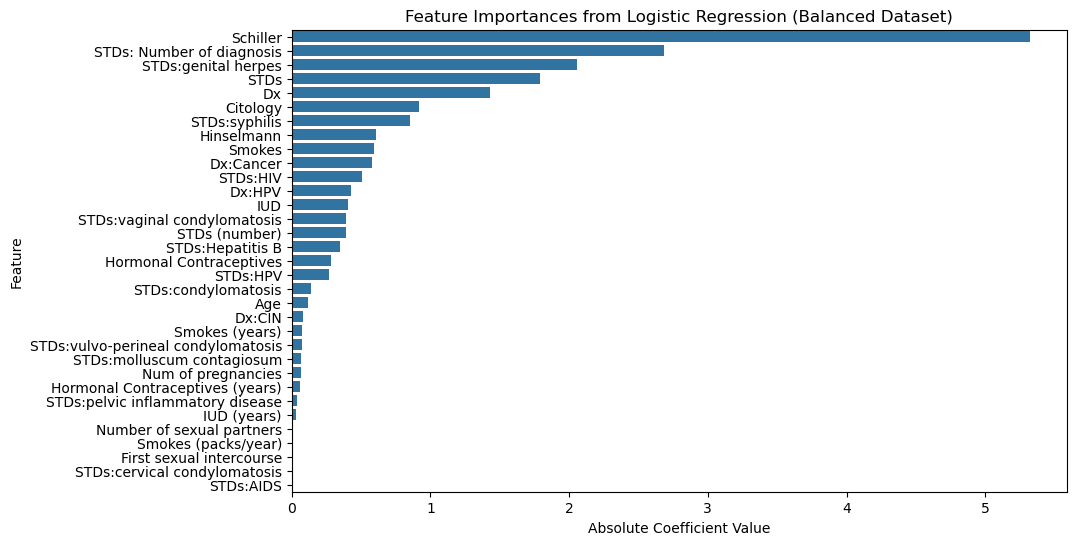

                     Feature  Importance
0                   Schiller    5.320635
1  STDs: Number of diagnosis    2.681823
2        STDs:genital herpes    2.057564
3                       STDs    1.791957
4                         Dx    1.426967


In [189]:
X = df.drop('Biopsy', axis=1).select_dtypes(include=[np.number])
y = df['Biopsy']

X_train, X_test, y_train, y_test = smote_train_test_split(X, y, test_size=0.2)

log_model = LogisticRegression(random_state=42, max_iter=1000)
log_model.fit(X_train, y_train)

importances = np.abs(log_model.coef_[0])
indices = np.argsort(importances)[::-1]
feature_names = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=feature_names[indices])
plt.title('Feature Importances from Logistic Regression (Balanced Dataset)')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.show()

feature_imp_df = pd.DataFrame({
    'Feature': feature_names[indices],
    'Importance': importances[indices]
}).head(5)
print(feature_imp_df)

# Modelling

## All Classifiers Basic Trainer

### Random Forest Classifier

In [190]:
def train_random_forest(X_train, X_test, y_train, y_test):
    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Random Forest Accuracy:", accuracy)
    print("Random Forest Classification Report:")
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(12, 8)) 
    sns.heatmap(
        conf_matrix,
        annot=True,
        fmt="d",
        cmap="viridis", 
        annot_kws={"size": 16}, 
        linewidths=.5, 
        cbar=True 
    )
    plt.title("Random Forest Confusion Matrix", fontsize=20)
    plt.xlabel("Predicted Labels", fontsize=14)
    plt.ylabel("True Labels", fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)


## XGBoost

In [191]:
def train_xgb_with_grid(X_train, X_test, y_train, y_test):
    param_grid = {
        'learning_rate': [0.05, 0.1, 0.2], 
        'max_depth': [3, 5, 7],             
        'n_estimators': [50, 100, 200]      
    }

    xgb_model = xgb.XGBClassifier()

    grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

    grid_search.fit(X_train, y_train)
    print("Best Parameters:", grid_search.best_params_)
    print("Best Score:", grid_search.best_score_)

    best_model = grid_search.best_estimator_

    y_pred = best_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print("XGBoost Accuracy:", accuracy)

    print("XGBoost Classification Report:")
    print(classification_report(y_test, y_pred))

    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(12, 8)) 
    sns.heatmap(
        conf_matrix,
        annot=True,
        fmt="d",
        cmap="viridis", 
        annot_kws={"size": 16}, 
        linewidths=.5, 
        cbar=True 
    )
    plt.title("XGBoost Confusion Matrix", fontsize=20)
    plt.xlabel("Predicted Labels", fontsize=14)
    plt.ylabel("True Labels", fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

## Logistic Regression

In [192]:
def train_log_reg_with_grid(X_train, X_test, y_train, y_test):
    param_grid = {
        'C': [0.01, 0.1, 1, 10],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga'],
        'max_iter': [500, 1000]
    }

    log_model = LogisticRegression()

    grid_search = GridSearchCV(estimator=log_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)
    
    print("Best Parameters:", grid_search.best_params_)
    print("Best Score:", grid_search.best_score_)

    best_model = grid_search.best_estimator_

    y_pred = best_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print("Logistic Regression Accuracy:", accuracy)

    print("Logistic Regression Classification Report:")
    print(classification_report(y_test, y_pred))

    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(12, 8)) 
    sns.heatmap(
        conf_matrix,
        annot=True,
        fmt="d",
        cmap="viridis", 
        annot_kws={"size": 16}, 
        linewidths=.5, 
        cbar=True 
    )
    plt.title("Logistic Regression Confusion Matrix", fontsize=20)
    plt.xlabel("Predicted Labels", fontsize=14)
    plt.ylabel("True Labels", fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)


## Train both models

### Random Forest Training

Random Forest Accuracy: 0.9520958083832335
Random Forest Classification Report:


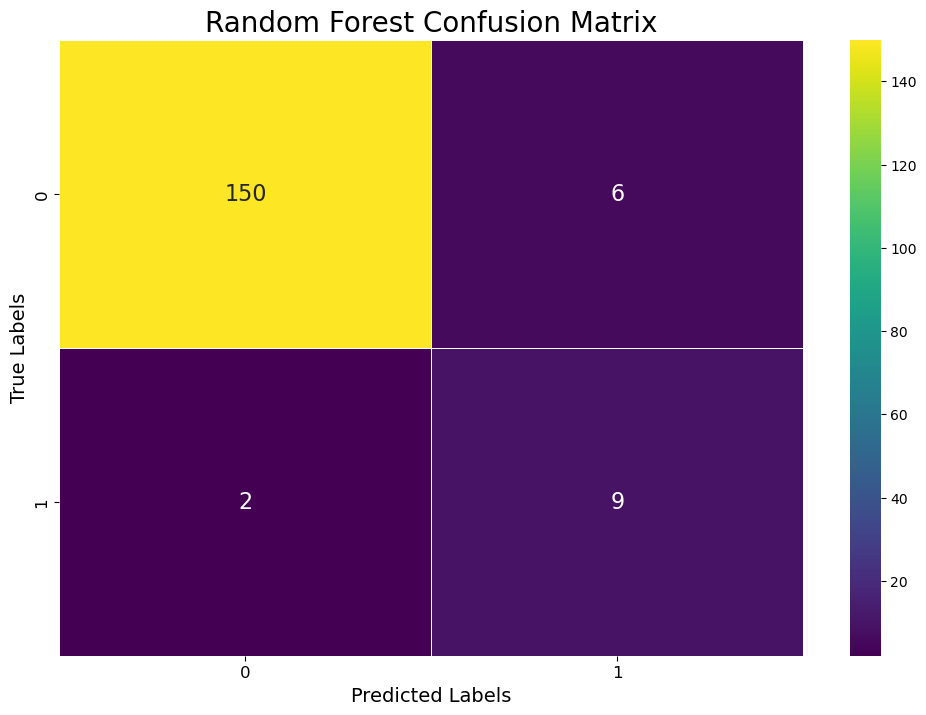

In [193]:
top_features = ['Schiller', 'Hinselmann', 'Age', 'First sexual intercourse', 'Hormonal Contraceptives (years)']
X = df[top_features]
y = df['Biopsy']

X_train, X_test, y_train, y_test = smote_train_test_split(X, y, test_size=0.2)

train_random_forest(X_train, X_test, y_train, y_test)


### XGBoost Training

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 50}
Best Score: 0.972007009776794
XGBoost Accuracy: 0.9640718562874252
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       156
           1       0.73      0.73      0.73        11

    accuracy                           0.96       167
   macro avg       0.85      0.85      0.85       167
weighted avg       0.96      0.96      0.96       167



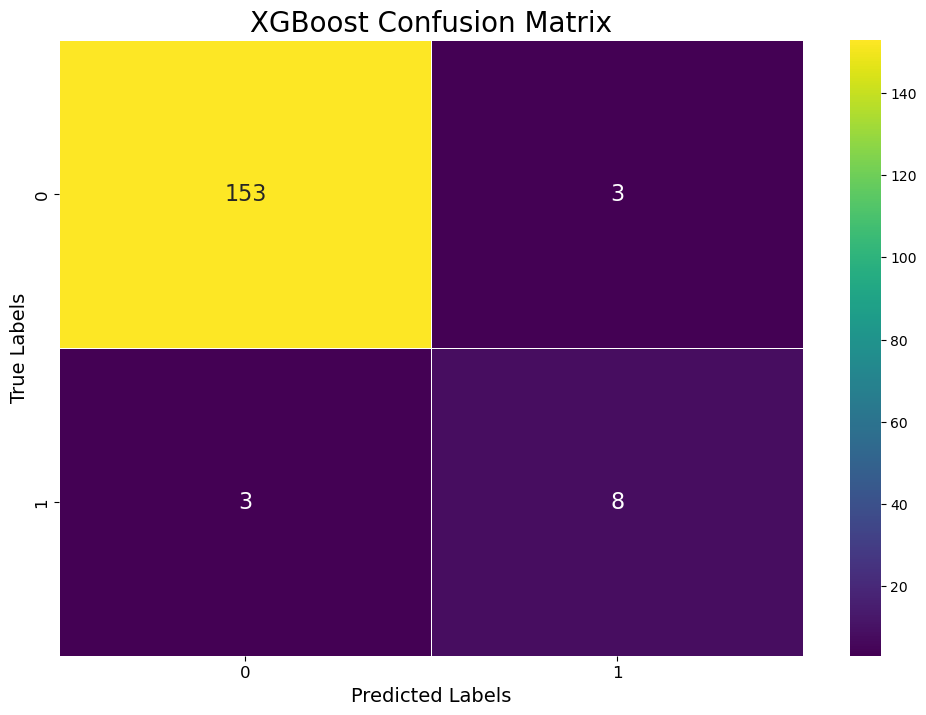

In [194]:
top_features_xgb = [
    'Schiller',
    'Hormonal Contraceptives (years)',
    'First sexual intercourse',
    'Num of pregnancies',
    'Number of sexual partners'
]

X = df[top_features_xgb]
y = df['Biopsy']

X_train, X_test, y_train, y_test = smote_train_test_split(X, y, test_size=0.2)

train_xgb_with_grid(X_train, X_test, y_train, y_test)


### Logistic Regression Training

Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best Parameters: {'C': 10, 'max_iter': 500, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score: 0.9087921970116214
Logistic Regression Accuracy: 0.9700598802395209
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       156
           1       0.71      0.91      0.80        11

    accuracy                           0.97       167
   macro avg       0.85      0.94      0.89       167
weighted avg       0.98      0.97      0.97       167



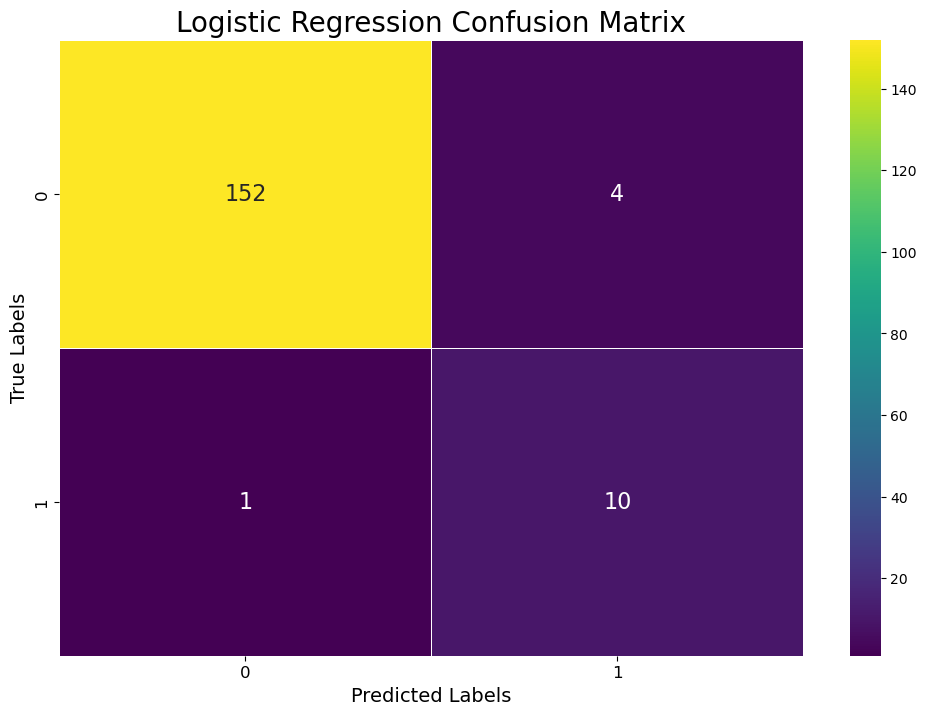

In [195]:
top_features_log_reg = [
    'Schiller',
    'Hinselmann',
    'Citology',
    'STDs:genital herpes',
    'Num of pregnancies'
]

X = df[top_features_log_reg]
y = df['Biopsy']

X_train, X_test, y_train, y_test = smote_train_test_split(X, y, test_size=0.2)

train_log_reg_with_grid(X_train, X_test, y_train, y_test)